# TITLE HERE

Members:

Date: 



In [207]:
#1 Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.ticker as ticker

#2 Data
data_bmw = pd.read_csv("data\\BMW_Data.csv") #or if its a .json file pd.read_json
data_cars = pd.read_csv("data\\bmw.csv")

data_bmw

,Date,Adj_Close,Close,High,Low,Open,Volume
0,1996-11-08,8.100290,18.171000,18.209999,18.171000,18.209999,767000
1,1996-11-11,8.078445,18.122000,18.200001,18.082001,18.190001,260000
2,1996-11-12,8.139520,18.259001,18.327999,18.091999,18.160999,1066000
3,1996-11-13,8.126592,18.230000,18.344000,18.190001,18.344000,793000
4,1996-11-14,8.152893,18.289000,18.289000,18.132000,18.205000,351000
...,...,...,...,...,...,...,...
7207,2024-12-19,77.279999,77.279999,78.379997,76.900002,77.080002,1297262
7208,2024-12-20,77.580002,77.580002,77.860001,76.120003,76.699997,2000177
7209,2024-12-23,76.940002,76.940002,77.680000,76.260002,77.620003,642208
7210,2024-12-27,78.339996,78.339996,78.459999,76.739998,76.879997,958948


## Hypothesis


## Data Pre-Processing

In [208]:
# remove irellevant columns
data_cars = data_cars.drop(columns=['mileage','transmission','mileage','fuelType','tax','mpg','engineSize'])
                                    
# since our stock data starts at 1996, we will gather all cars that had at least one model since 1996
data_cars = data_cars[data_cars["year"] >= 1996]

data_cars = data_cars.sort_values(by=["year"], ascending=True)

data_cars

,model,year,price
9625,5 Series,1996,5995
9841,Z3,1997,3950
9842,Z3,1998,3950
9560,Z3,1999,3995
9744,3 Series,1999,1200
...,...,...,...
5128,3 Series,2020,36999
1771,X6,2020,65352
5588,8 Series,2020,66991
2013,2 Series,2020,25603


In [228]:
# adds a column that specifies the year of each stock, important for joining the datasets because the other dataset only has year
data_bmw["Year"] = data_bmw["Date"].str.strip().str.extract(r"(\d{4})")


# This groups by the years and averages on all the other columns (other than date)
avg_year = (
    data_bmw
    .groupby("Year")[["Adj_Close", "Close", "High", "Low", "Open", "Volume"]].mean()
    .sort_values("Year").reset_index()
    .rename(columns = {"Year" : "year"})
    )
avg_year["year"] = avg_year["year"].astype(int)

# This filters for the years each model was released
model_release = data_cars.loc[data_cars.groupby("model")["year"].idxmin()].sort_values("year").reset_index(drop=True)

#this is the merged dataset, it will be used for the scatterplot but probably not much else because its only 23 rows
bmw_merge = pd.merge(model_release, avg_year, on = "year").drop_duplicates()


## Data Visualizations

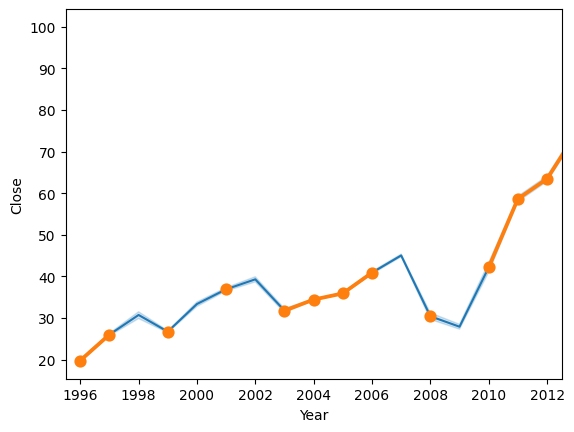

In [229]:
# This shows the stock close over time with points indicating when a new model is released, half the graph is cut off because of the xaxis ticks, but i've been stuck on xaxis labels for over an hour so i'll come back to it
sns.lineplot(data = data_bmw, y = "Close", x = "Year").xaxis.set_major_locator(ticker.MultipleLocator(base=2))
sns.pointplot(data = bmw_merge, y = "Close", x = "year").xaxis.set_major_locator(ticker.MultipleLocator(base=2))

## Conclusions

## Potential Limitations

## Sources